<a href="https://colab.research.google.com/github/ssuzana/Data-Structures-and-Algorithms-Notebooks/blob/main/02_Two_Pointers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Leetcode 125. Valid Palindrome** `Easy`

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string `s`, return `true` if it is a palindrome, or `false` otherwise.

In [ ]:
# Input: s: str, Output: bool
def isPalindrome1(s):
  res = ""
  for ch in s:
    if ch.isalnum():
      res += ch
  res = res.lower()
        
  return res == res[::-1]            

In [ ]:
def isPalindrome2(s):
  alphanum_s = ""
  for char in s:
    if char.isalnum():
      alphanum_s += char
  s = alphanum_s.lower()
        
  if s == "":
    return True
        
  res = False
  for i in range(1+len(s)//2):
    if s[i] == s[len(s)-1-i]:
      res = True
    else:
      res = False
      break
                
  return res                  

In [ ]:
# Example 1: Output: true, Explanation: "amanaplanacanalpanama" is a palindrome.
s1 = "A man, a plan, a canal: Panama"
print(isPalindrome2(s1))
# Example 2: Output: false, Explanation: "raceacar" is not a palindrome.
s2 = "race a car"
print(isPalindrome2(s2))
# Example 3: Output: true, Explanation: s is an empty string "" after removing non-alphanumeric characters.
# Since an empty string reads the same forward and backward, it is a palindrome.
s3 = " "
print(isPalindrome2(s3))

True
False
True


#**Leetcode 167. Two Sum II - Input Array Is Sorted** `Medium`

Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be `numbers[index1]` and `numbers[index2]` where `1 <= index1 < index2 <= numbers.length`.

Return the indices of the two numbers, `index1` and `index2`, added by one as an integer array `[index1, index2]` of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only **constant extra space**.

In [ ]:
# Space: O(n), Time: O(n)
# Input: numbers: List[int], target: int, Output: List[int]
def twoSum1(numbers, target):
  index_dict = {}
  for i, num in enumerate(numbers):
    pair_num = target - num
    if pair_num in index_dict:
      return [1+index_dict[pair_num], 1+i]
    index_dict[num] = i

In [ ]:
# Space: O(1)
def twoSum2(numbers, target):
  left = 0
  right = len(numbers) - 1
  while left < right:
    s = numbers[left] + numbers[right]
    if s == target:
      return [left + 1, right + 1]
    elif s < target:
      left += 1
    else:
      right -= 1           

In [ ]:
# Example 1:
numbers1 = [2,7,11,15]
target1 = 9
# Output: [1,2]
# Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].
print(twoSum2(numbers1, target1))
# Example 2:
numbers2 = [2,3,4]
target2 = 6
# Output: [1,3]
# Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].
print(twoSum2(numbers2, target2))
# Example 3:
numbers3 = [-1,0] 
target3 = -1
# Output: [1,2]
# Explanation: The sum of -1 and 0 is -1. Therefore index1 = 1, index2 = 2. We return [1, 2].
print(twoSum2(numbers3, target3))

[1, 2]
[1, 3]
[1, 2]


#**Leetcode 15. 3Sum** `Medium`

Given an integer array `nums`, return all the triplets `[nums[i], nums[j], nums[k]]` such that `i != j, i != k`, and `j != k`, and `nums[i] + nums[j] + nums[k] == 0`.

Notice that the solution set must not contain duplicate triplets.

In [ ]:
# Input: nums: List[int], Output: List[List[int]]
def threeSum(nums):
  nums.sort()
  res = set()
  for i in range(len(nums)):
    if i > 0 and nums[i] == nums[i - 1]:
      continue
    left = i+1
    right = len(nums) - 1
    while left < right:
      s = nums[i] + nums[left] + nums[right]
      if s == 0:
        res.add((nums[i], nums[left], nums[right]))
        left += 1
        right -= 1
      elif s < 0:
        left += 1
      else:
        right -= 1
  return list(res)


In [ ]:
# Example:
nums = [-1,0,1,2,-1,-4]
# Output: [[-1,-1,2],[-1,0,1]]
threeSum(nums)

[(-1, -1, 2), (-1, 0, 1)]

#**Leetcode 11. Container With Most Water** `Medium`

You are given an integer array height of length `n`. There are `n` vertical lines drawn such that the two endpoints of the ith line are `(i, 0)` and `(i, height[i])`.

Find two lines that together with the `x`-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

Example:

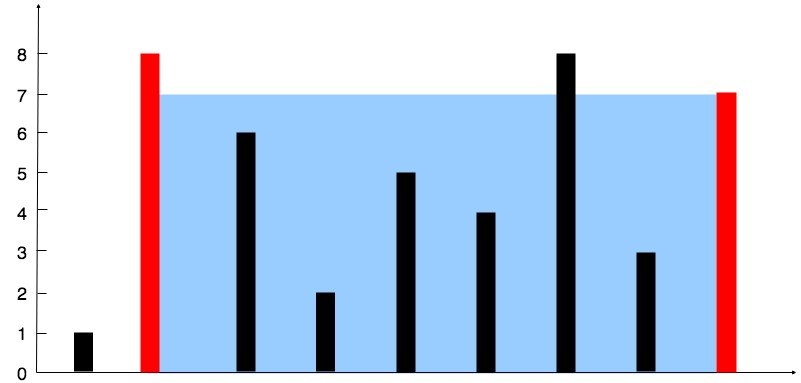

Input: height = [1,8,6,2,5,4,8,3,7]

Output: 49

Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.

In [ ]:
# Time Complexity: O(n)
def maxArea(height):
  l = 0
  r = len(height) - 1
  max_area = 0
  while l < r:
      cur_height = min(height[r], height[l])
      cur_area = (r-l)* cur_height
      if cur_area > max_area:
          max_area = cur_area
      if height[l] == cur_height:
          l += 1
      elif height[r] == cur_height:
          r -= 1      
  return max_area

In [ ]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

#**42. Trapping Rain Water** `Hard`

Given `n` non-negative integers representing an elevation map where the width of each bar is `1`, compute how much water it can trap after raining.

**Example 1**

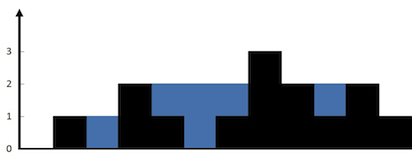

Input: `height = [0,1,0,2,1,0,1,3,2,1,2,1]`
Output: `6`

In [ ]:
# Time: O(n), Space: O(1)

from typing import List
class Solution:
    def trap(self, height: List[int]) -> int:
        
        left = 0
        right = len(height) - 1
        left_max = 0
        right_max = 0
        res = 0
        
        while left < right:
            if height[left] < height[right]:
                if height[left] >= left_max:
                    left_max = height[left]
                else:
                    res += left_max - height[left]
                left += 1   
                
            else:
                if height[right] >= right_max:
                    right_max = height[right]
                else:
                    res += right_max - height[right]
                right -= 1 
                
        return res

In [ ]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
sol = Solution()
sol.trap(height)

6